# Loan Prices

Welcome to the Loan Data Analysis project. In this project, we aim to explore and analyze loan data to gain insights about loan approvals, defaults, borrower characteristics, and more.

## Step 1: Import Libraries
First, we will import the required Python libraries for data analysis and visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Step 2: Load the Dataset

Now we'll load the loan dataset using Pandas. Make sure your dataset file (e.g., `loan.csv`) is in the same directory as your notebook.

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Step 3: Exploratory Data Analysis (EDA)

In this step, we will explore the dataset to understand its structure, data types, missing values, and get some initial insights.


#### Shape of Data

In [3]:
df.shape

(614, 13)

#### Data types and not null

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Summary Statistics

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Checking unique values in catagorical column

In [6]:
df.select_dtypes(include='object').nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

## Step 4: Data Cleaning

In this step, we'll handle missing values and ensure that the data types are appropriate for analysis.

#### Checking missing values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Fill the missing values

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

#### Verify there is no missing values

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Detecting the Outliers

Outliers are values that are unusually high or low compared to the rest of the data. We'll visualize the numerical columns to detect outliers and then decide how to handle them.


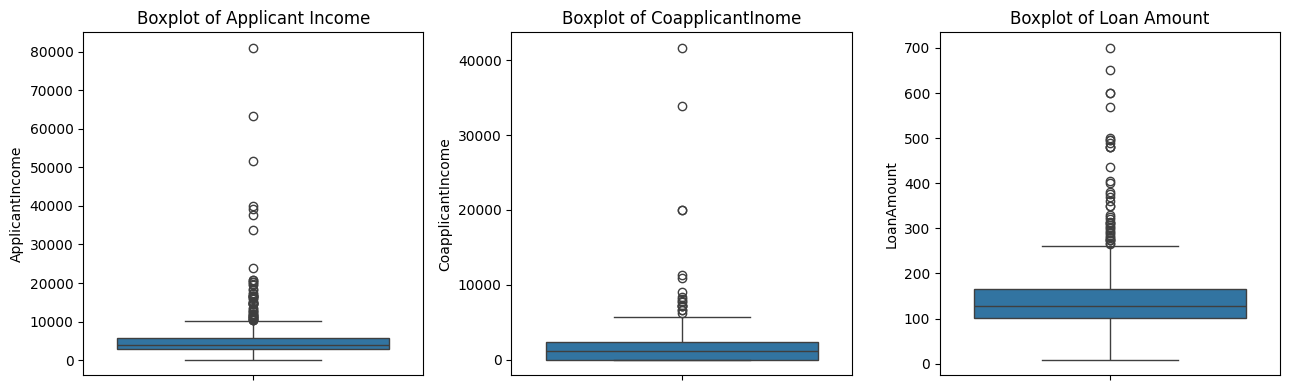

In [10]:
plt.figure(figsize=(13,4))

plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])
plt.title('Boxplot of Applicant Income')

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])
plt.title('Boxplot of CoapplicantInome')

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])
plt.title('Boxplot of Loan Amount')

plt.tight_layout()
plt.show()

This will show you if there are extreme values (outliers) in those columns.

##### Handle the Outliers

In [11]:
def out(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df

df = out(df, 'ApplicantIncome')
df = out(df, 'CoapplicantIncome')
df = out(df, 'LoanAmount')


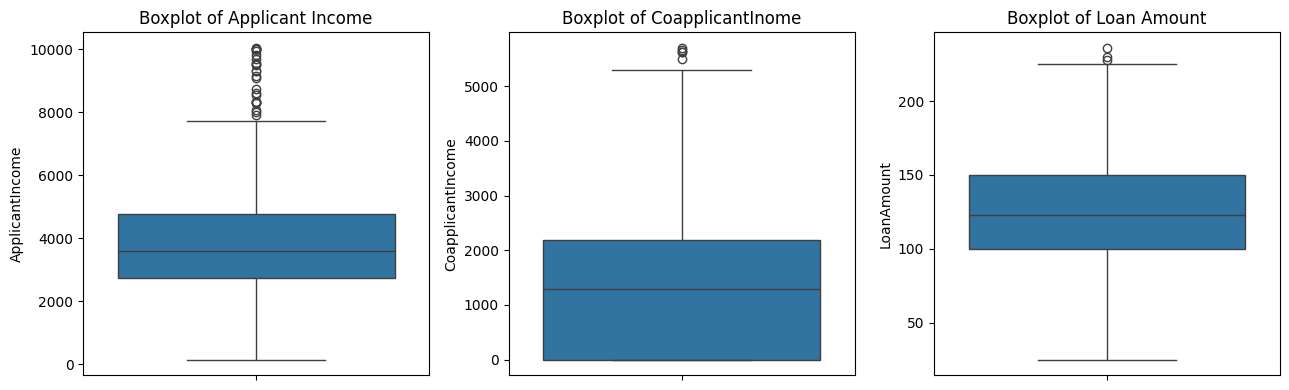

In [12]:
plt.figure(figsize=(13,4))

plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])
plt.title('Boxplot of Applicant Income')

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])
plt.title('Boxplot of CoapplicantInome')

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])
plt.title('Boxplot of Loan Amount')

plt.tight_layout()
plt.show()

## Step:5 Data Visualization

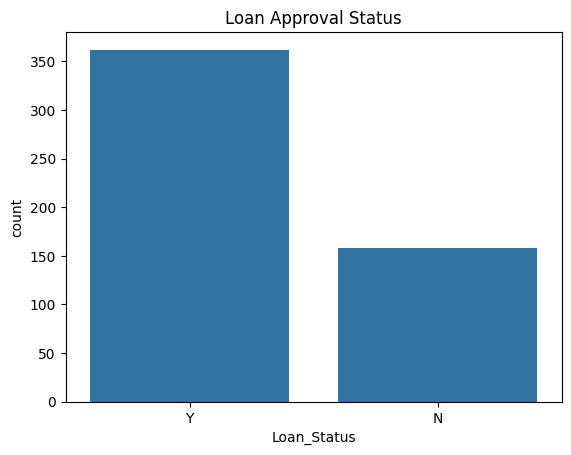

In [13]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status')
plt.show()

#### Categorical Variables vs Loan Status

This visualization compares various categorical features with the loan approval status.

- **Gender**: Shows whether male or female applicants have higher approval rates.
- **Married**: Checks if married applicants are more likely to be approved.
- **Education**: Determines whether education level affects approval.
- **Self_Employed**: Analyzes the approval trend for self-employed individuals.


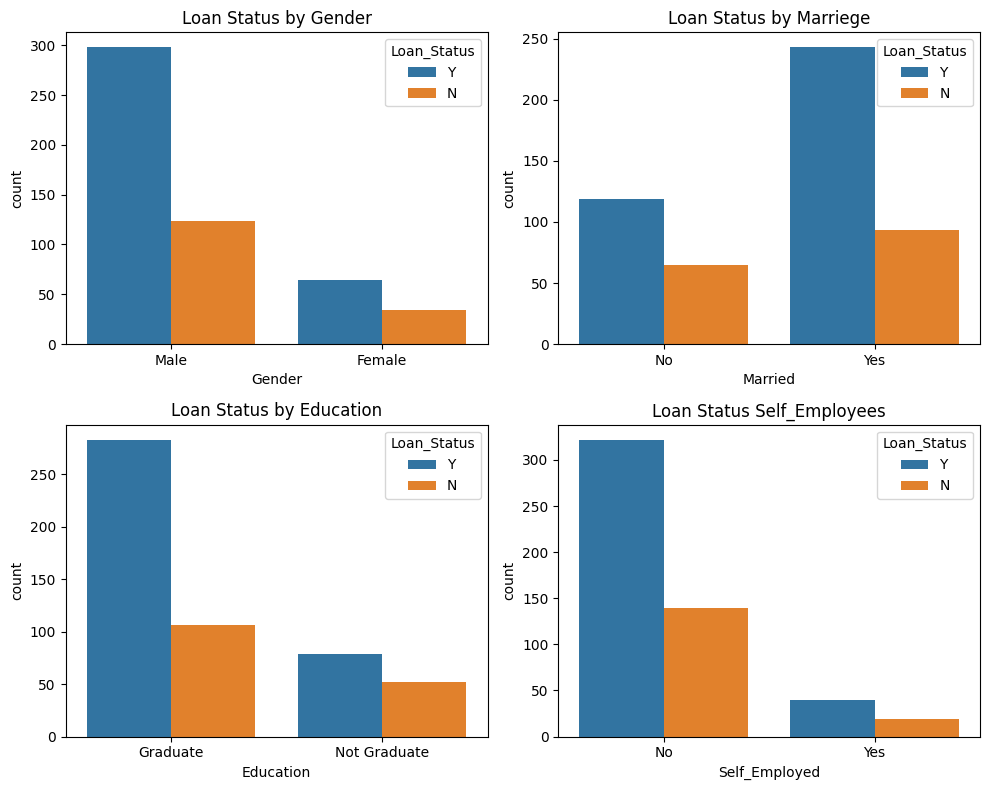

In [14]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Loan Status by Gender')

plt.subplot(2,2,2)
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Loan Status by Marriege')

plt.subplot(2,2,3)
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')

plt.subplot(2,2,4)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title('Loan Status Self_Employees')
plt.tight_layout()
plt.show()

## Step 6: Feature Engineering

In this step, we will create new features, transform existing features, and prepare the data for the model.


#### Convert Dependents into numerical

In [15]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

#### Create Total Income Feature

In [16]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

#### Create Loan Amount log transformation

In [17]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

#### Create Total Income Log Transformation

In [18]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])

### Feature Scalling

In [19]:
colm = ['ApplicantIncome','CoapplicantIncome','LoanAmount','LoanAmount_log','TotalIncome','TotalIncome_log']
scaler = StandardScaler()

df[colm] = scaler.fit_transform(df[colm])

In [20]:
df[colm].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_log,TotalIncome,TotalIncome_log
0,1.033643,-0.943785,0.109491,0.257050,0.275027,0.443781
1,0.327548,0.136399,0.109491,0.257050,0.399269,0.555681
2,-0.555349,-0.943785,-1.451763,-1.536392,-1.187637,-1.399043
3,-0.787925,0.745256,-0.091961,0.082306,-0.191136,-0.021861
4,1.117861,-0.943785,0.436851,0.518955,0.352550,0.514133


## Step 7: Insights

### Key Insights

- Applicants with a **credit history** of 1 are more likely to get loans.
- **Married and graduate** applicants have higher approval rates.
- **Self-employed** applicants have slightly lower approval chances.
- **Total Income** is a better indicator than individual income columns.
- Log transformation helped normalize skewed income and loan amount distributions.

### Final Insights

Based on the analysis performed, we found:

- Applicants with a good credit history have significantly higher chances of loan approval.
- Total income (sum of applicant and co-applicant income) gives better insights than individual incomes.
- Married, educated, and male applicants tend to have higher loan approval rates.
- Log transformation helped reduce skewness in `LoanAmount` and `Total_Income`.
